In [1]:
#general imports
import numpy as np

#tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [2]:
#preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[], []
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
#define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
#choose the number of time steps
n_steps = 3
#split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
X, y

(array([[110, 125, 133],
        [125, 133, 146],
        [133, 146, 158],
        [146, 158, 172],
        [158, 172, 187],
        [172, 187, 196]]),
 array([146, 158, 172, 187, 196, 210]))

In [5]:
X.shape

(6, 3)

In [6]:
#reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

### Building LSTM Model

In [7]:
#instansiate in deep learning includes two steps
#define the model model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
#compile the model
model.compile(optimizer='adam', loss='mse')

In [8]:
# fit model
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 3ms/step - loss: 36241.2930
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 35686.5312
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 35125.3398
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 34546.3086
Epoch 5/300
1/1 [==============================] - 0s 998us/step - loss: 33941.0391
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 33289.1133
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 32586.6387
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 31855.1504
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 31107.9863
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 30326.7168
Epoch 11/300
1/1 [==============================] - 0s 997us/step - loss: 29477.3594
Epoch 12/300
1/1 [==============================] - 0s 998us/step - loss: 28538.4609
Epoch 1

1/1 [==============================] - 0s 2ms/step - loss: 14.8067
Epoch 101/300
1/1 [==============================] - 0s 2ms/step - loss: 14.8032
Epoch 102/300
1/1 [==============================] - 0s 3ms/step - loss: 14.7844
Epoch 103/300
1/1 [==============================] - 0s 998us/step - loss: 14.7450
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 14.6840
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 14.6043
Epoch 106/300
1/1 [==============================] - 0s 997us/step - loss: 14.5111
Epoch 107/300
1/1 [==============================] - 0s 2ms/step - loss: 14.4115
Epoch 108/300
1/1 [==============================] - 0s 3ms/step - loss: 14.3119
Epoch 109/300
1/1 [==============================] - 0s 998us/step - loss: 14.2177
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 14.1327
Epoch 111/300
1/1 [==============================] - 0s 997us/step - loss: 14.0576
Epoch 112/300
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 2.8142
Epoch 202/300
1/1 [==============================] - 0s 999us/step - loss: 2.7837
Epoch 203/300
1/1 [==============================] - 0s 998us/step - loss: 2.7780
Epoch 204/300
1/1 [==============================] - 0s 999us/step - loss: 2.7392
Epoch 205/300
1/1 [==============================] - 0s 998us/step - loss: 2.6741
Epoch 206/300
1/1 [==============================] - 0s 998us/step - loss: 2.6071
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 2.5681
Epoch 208/300
1/1 [==============================] - 0s 2ms/step - loss: 2.5538
Epoch 209/300
1/1 [==============================] - 0s 998us/step - loss: 2.5420
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 2.5107
Epoch 211/300
1/1 [==============================] - 0s 2ms/step - loss: 2.4399
Epoch 212/300
1/1 [==============================] - 0s 998us/step - loss: 2.3270
Epoch 213/300
1/1 [=====================

### Predicting for the next 10 days

In [17]:
#demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lstm_output = []
i = 0

while(i<10):
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        y_hat = model.predict(x_input, verbose=0)
        temp_input.append(y_hat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(y_hat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        y_hat = model.predict(x_input, verbose=0)
        temp_input.append(y_hat[0][0])
        lstm_output.append(y_hat[0][0])
        i = i + 1
    
print(lstm_output)

[221.82756, 232.82376, 246.3523, 258.5158, 271.29083, 285.20996, 298.6901, 313.0252, 327.99792, 343.12686]


### Visualising the output

In [18]:
import matplotlib.pyplot as plt

In [21]:
known_days = np.arange(1,10)
predicted_days = np.arange(10,20)

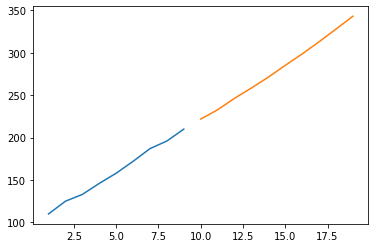

In [22]:
plt.plot(known_days,timeseries_data)
plt.plot(predicted_days,lst_output)